## 1. Load libraries

In [4]:
import numpy as np
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
results = pickle.load(open("results.pickle", 'rb'))

## 2. Main systematicity results for S --> S CONJ S and S --> NP VP

### 2.1 S --> S CONJ S

In [5]:
s1p_results = []
s3_results = []
models = [] 
hue = []
s1p_all_annotations = []
s3_all_annotations = []

for data_type in ["synthetic", "semi_natural", "natural"]:
    for model in ["tiny", "small", "all"]:
        s1p_annotations = []
        s3_annotations = []
        for t in range(1, 11):
            size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                            for seed in [1, 2, 3, 4, 5]]
            s1p, s3 = zip(*size_results)
            s1p_results.append(np.mean(s1p))
            s3_results.append(np.mean(s3))
            models.append(model)
            hue.append(data_type)
            s1p_annotations.append((np.mean(s1p), data_type, model, t))
            s3_annotations.append((np.mean(s3), data_type, model, t))
        s3_all_annotations.append(min(s3_annotations))
        s3_all_annotations.append(max(s3_annotations))
        s1p_all_annotations.append(min(s1p_annotations))
        s1p_all_annotations.append(max(s1p_annotations))

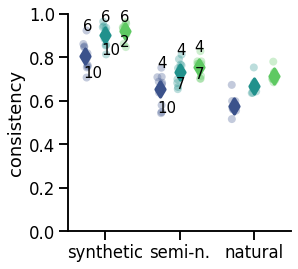

In [6]:
plt.figure(figsize=(4, 4))

# Plot individual templates as datapoints
sns.stripplot(
    x=hue,
    y=s1p_results,
    hue=models,
    dodge=True,
    zorder=1,
    label=None,
    alpha=0.3,
    size=8,
    palette="viridis")

# Average over templates
ax = sns.pointplot(
    x=hue,
    y=s1p_results,
    hue=models,
    dodge=.532,
    join=False, 
    markers="d",
    scale=1.05,
    ci=None,
    palette="viridis")

# Prettify axes
plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n.", "natural"])
ax.set_ylabel("consistency")
plt.ylim(0.0, 1)

# Annotate minimum and maximum scoring templates
for y, x, m, t in s1p_all_annotations:
    if x == "natural":
        continue
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)

plt.savefig("figures/s1p.pdf", bbox_inches="tight")
plt.show()

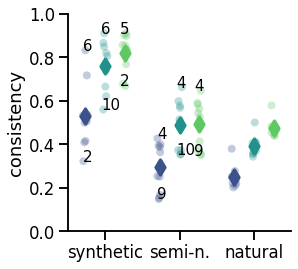

In [7]:
plt.figure(figsize=(4, 4))
# Plot individual templates as datapoints
sns.stripplot(
    x=hue,
    y=s3_results,
    hue=models,
    dodge=True,
    zorder=-1,
    label=None,
    alpha=0.3,
    size=8,
    palette="viridis")

# Average over templates
ax = sns.pointplot(
    x=hue,
    y=s3_results,
    hue=models,
    dodge=.532,
    join=False, 
    markers="d",
    scale=1.05,
    ci=None,
    palette="viridis")

# Prettify axes
plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n.", "natural"])
ax.set_ylabel("consistency")
plt.ylim(0.0, 1)

# Annotate minimum and maximum scoring templates
for y, x, m, t in s3_all_annotations:
    if x == "natural":
        continue
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)

plt.savefig("figures/s3.pdf", bbox_inches="tight")
plt.show()

## 2.1 S --> NP VP

In [8]:
np_results = []
vp_results = []
models_np = []
models_vp = []
hue_np = []
hue_vp = []
np_all_annotations = []
vp_all_annotations = []

for data_type in ["synthetic", "semi_natural"]:
    for model in ["tiny", "small", "all"]:
        np_annotations = []
        vp_annotations = []
        for t in range(1, 11):
            size_results = [
                results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                for seed in [1, 2, 3, 4, 5]]
            np_, vp = zip(*size_results)
            np_results.append(np.mean(np_))
            models_np.append(model)
            hue_np.append(data_type)
            np_annotations.append((np.mean(np_), data_type, model, t))

            # VP is there only for synthetic
            if data_type == "synthetic":
                vp_results.append(np.mean(vp))
                hue_vp.append(data_type)
                models_vp.append(model)
                vp_annotations.append((np.mean(vp), data_type, model, t))

        # Collect the minimum and maximum scoring templates
        np_all_annotations.append(min(np_annotations))
        np_all_annotations.append(max(np_annotations))
        if data_type == "synthetic":
            vp_all_annotations.append(min(vp_annotations))
            vp_all_annotations.append(max(vp_annotations))

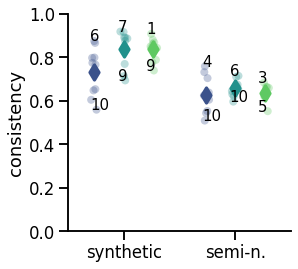

In [9]:
# Plot the templates as individual data points
plt.figure(figsize=(4, 4))
sns.stripplot(
    x=hue_np,
    y=np_results,
    hue=models_np,
    dodge=True,
    zorder=1,
    label=None,
    alpha=0.3,
    size=8,
    palette="viridis")

# Plot the averages across templates
ax = sns.pointplot(
    x=hue_np,
    y=np_results,
    hue=models_np,
    dodge=.532,
    join=False, 
    markers="d",
    scale=1.05,
    ci=None,
    palette="viridis")

# Prettify axes
plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n."])
ax.set_ylabel("consistency") #"consistency")
plt.ylim(0.0, 1)
for y, x, m, t in np_all_annotations:
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)

    plt.savefig("figures/np.pdf", bbox_inches="tight")
plt.show()

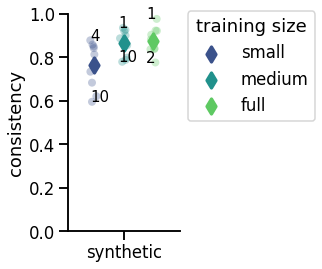

In [10]:
plt.figure(figsize=(2, 4))
# Scatter individual templates
ax = sns.pointplot(x=hue_vp, y=vp_results, hue=models_vp,
                   dodge=.532, join=False, 
                   markers="d", scale=1.05, ci=None, palette="viridis")

# Show the average
sns.stripplot(x=hue_vp, y=vp_results, hue=models_vp,
              dodge=True, zorder=-1, label=None, alpha=0.3,
              size=8, palette="viridis")

# Prettify axes
sns.despine(top=True, right=True)
plt.xticks([0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylim(0, 1)
plt.xlim(-0.5, 0.5)
plt.ylabel("consistency")
ax.set_xticklabels(["synthetic"])
plt.ylim(0.0, 1)

# Annotate the minimum and maximum templates
for y, x, m, t in vp_all_annotations:
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)
plt.legend(["small", "medium", "full"], title="training size", bbox_to_anchor=(1.0, 1.05))
plt.savefig("figures/vp.pdf", bbox_inches="tight")
plt.show()

## 3. Create table for appendix

In [11]:
# Print NP & VP to table while averaging over seeds and templates
for data_type in ["synthetic", "semi_natural"]:
    np_results = []
    vp_results = []
    for model in ["tiny", "small", "all"]:
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for t in range(1, 11)]
        np_, vp = zip(*size_results)
        np_results.append(f"{np.nanmean(np_):.2f}")
        if data_type == "synthetic":
            vp_results.append(f"{np.nanmean([x for x in vp if x is not None]):.2f}")
    print(f"{data_type} & NP & " + " & ".join(np_results).replace("0.", ".") + " \\\\")
    if data_type == "synthetic":
        print(f"{data_type} & VP & " + " & ".join(vp_results).replace("0.", ".") + " \\\\")

# Print S CONJ S to table while averaging over seeds and templates
for data_type in ["synthetic", "semi_natural", "natural"]:
    s1p_results = []
    s3_results = []
    for model in ["tiny", "small", "all"]:
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for t in range(1, 11)]
        s1p, s3 = zip(*size_results)
        s1p_results.append(f"{np.mean(s1p):.2f}")
        s3_results.append(f"{np.mean(s3):.2f}")
    print(f"{data_type} & $\\text{{S}}^\prime_1$ & " + " & ".join(s1p_results).replace("0.", ".") + " \\\\")
    print(f"{data_type} & $\\text{{S}}_3$ & " + " & ".join(s3_results).replace("0.", ".") + " \\\\")

# Print NP & VP to table while averaging over seeds and templates
for data_type in ["synthetic", "semi_natural"]:
    np_results = []
    vp_results = []
    for t in range(1, 11):
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for model in ["tiny", "small", "all"]]
        np_, vp = zip(*size_results)
        np_results.append(f"{np.nanmean(np_):.2f}")
        if data_type == "synthetic":
            vp_results.append(f"{np.nanmean([x for x in vp if x is not None]):.2f}")
    print(" & ".join(np_results).replace("0.", ".") + " \\\\")
    if data_type == "synthetic":
        print(" & ".join(vp_results).replace("0.", ".") + " \\\\")

# Print S CONJ S to table while averaging over seeds and templates
for data_type in ["synthetic", "semi_natural", "natural"]:
    s1p_results = []
    s3_results = []
    for t in range(1, 11):
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for model in ["tiny", "small", "all"]]
        s1p, s3 = zip(*size_results)
        s1p_results.append(f"{np.mean(s1p):.2f}")
        s3_results.append(f"{np.mean(s3):.2f}")
    print(" & ".join(s1p_results).replace("0.", ".") + " \\\\")
    print(" & ".join(s3_results).replace("0.", ".") + " \\\\")

synthetic & NP & .73 & .84 & .84 \\
synthetic & VP & .76 & .87 & .88 \\
semi_natural & NP & .63 & .66 & .64 \\
synthetic & $\text{S}^\prime_1$ & .81 & .90 & .92 \\
synthetic & $\text{S}_3$ & .53 & .76 & .82 \\
semi_natural & $\text{S}^\prime_1$ & .65 & .73 & .76 \\
semi_natural & $\text{S}_3$ & .29 & .49 & .49 \\
natural & $\text{S}^\prime_1$ & .58 & .67 & .72 \\
natural & $\text{S}_3$ & .25 & .39 & .47 \\
.86 & .74 & .85 & .87 & .75 & .89 & .85 & .85 & .70 & .68 \\
.92 & .73 & .90 & .91 & .84 & .88 & .85 & .82 & .77 & .74 \\
.66 & .63 & .65 & .70 & .64 & .69 & .63 & .63 & .60 & .58 \\
.91 & .82 & .88 & .88 & .86 & .95 & .90 & .91 & .84 & .79 \\
.75 & .54 & .72 & .66 & .73 & .88 & .74 & .81 & .66 & .55 \\
.73 & .75 & .75 & .80 & .75 & .73 & .66 & .68 & .64 & .64 \\
.50 & .50 & .51 & .58 & .52 & .43 & .35 & .31 & .28 & .29 \\
.67 & .74 & .65 & .64 & .63 & .64 & .62 & .66 & .63 & .66 \\
.39 & .49 & .35 & .35 & .34 & .37 & .33 & .38 & .34 & .38 \\
